In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pdf = sns.load_dataset('penguins')
pdf.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
pdf.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [4]:
strcols = pdf.dtypes[pdf.dtypes == 'object'].index.tolist()
strcols

['species', 'island', 'sex']

In [5]:
numcols = pdf.dtypes[pdf.dtypes != 'object'].index.tolist()
numcols

['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

## find missing entries in each column

In [6]:
pdf.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [7]:
pdf.shape[0]

344

In [8]:
100*pdf.isna().sum()/pdf.shape[0]

species              0.000000
island               0.000000
bill_length_mm       0.581395
bill_depth_mm        0.581395
flipper_length_mm    0.581395
body_mass_g          0.581395
sex                  3.197674
dtype: float64

-- Fill all missing values

In [9]:
for col in numcols:
  pdf[col]= pdf[col].fillna(pdf[col].mean())

In [10]:
100*pdf.isna().sum()/pdf.shape[0]

species              0.000000
island               0.000000
bill_length_mm       0.000000
bill_depth_mm        0.000000
flipper_length_mm    0.000000
body_mass_g          0.000000
sex                  3.197674
dtype: float64

In [11]:
pdf2 = pdf[:]
pdf2.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,NaN
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female


In [12]:
pdf2.sex.value_counts()

Male      168
Female    165
Name: sex, dtype: int64

In [13]:
 pdf2.sex.mode().values[0]

'Male'

In [14]:
pdf2.sex= pdf2.sex.fillna(pdf2.sex.mode().values[0])


In [15]:
100*pdf2.isna().sum()/pdf2.shape[0]

species              0.0
island               0.0
bill_length_mm       0.0
bill_depth_mm        0.0
flipper_length_mm    0.0
body_mass_g          0.0
sex                  0.0
dtype: float64

In [16]:
pdf2.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,Male
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female


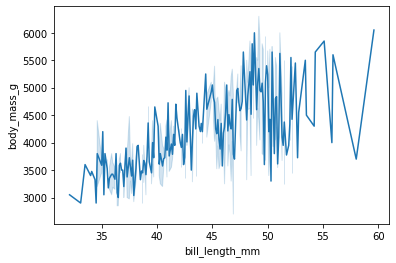

In [17]:
sns.lineplot(data=pdf2,x='bill_length_mm',y='body_mass_g')

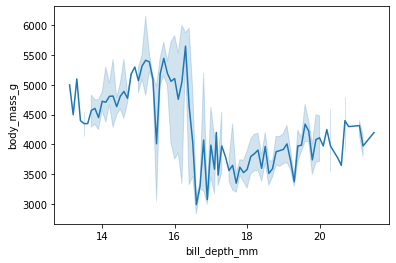

In [18]:
sns.lineplot(data=pdf2,x='bill_depth_mm',y='body_mass_g')

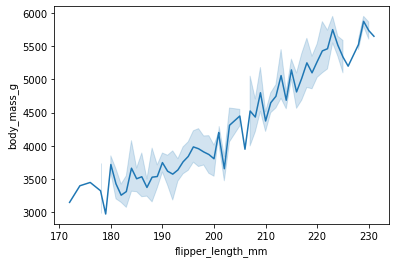

In [19]:
sns.lineplot(data=pdf2,x='flipper_length_mm',y='body_mass_g')

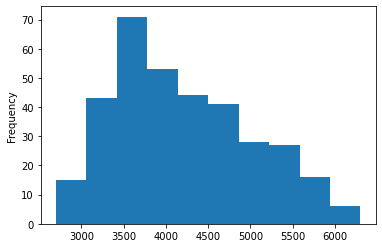

In [20]:
pdf2.body_mass_g.plot(kind='hist')

- Above Distribution shows body mass gram of penguins.
- 

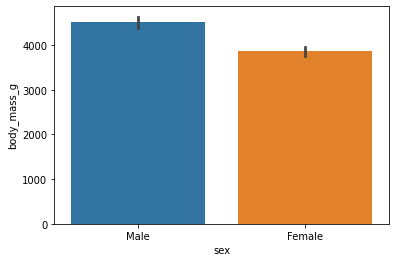

In [21]:
sns.barplot(data=pdf2,x='sex',y='body_mass_g')

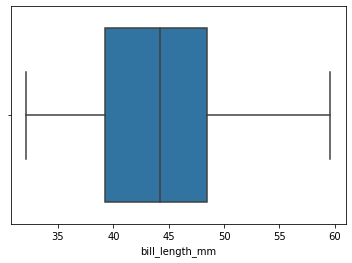

In [22]:
sns.boxplot(data=pdf2,x='bill_length_mm')

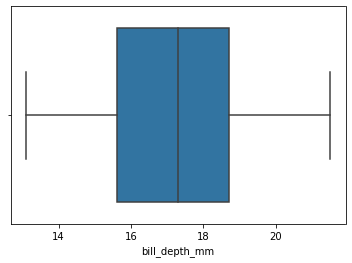

In [23]:
sns.boxplot(data=pdf2,x='bill_depth_mm')

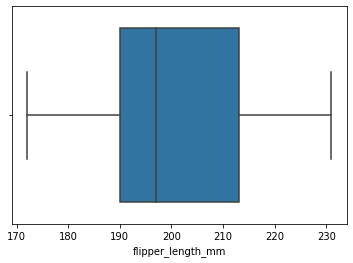

In [24]:
sns.boxplot(data=pdf2,x='flipper_length_mm')

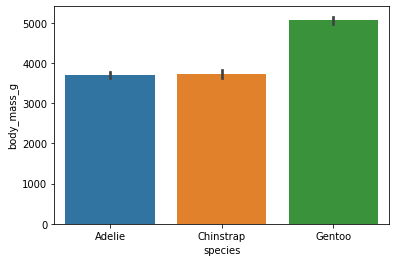

In [25]:
sns.barplot(data=pdf2,x='species',y='body_mass_g')

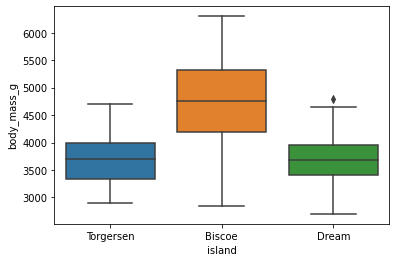

In [26]:
sns.boxplot(data=pdf2,x='island',y='body_mass_g')

In [27]:
pdf2.groupby('island').count()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
island,,,,,,
Biscoe,168,168,168,168,168,168
Dream,124,124,124,124,124,124
Torgersen,52,52,52,52,52,52


In [28]:
pdf2.bill_length_mm

0      39.10000
1      39.50000
2      40.30000
3      43.92193
4      36.70000
         ...   
339    43.92193
340    46.80000
341    50.40000
342    45.20000
343    49.90000
Name: bill_length_mm, Length: 344, dtype: float64

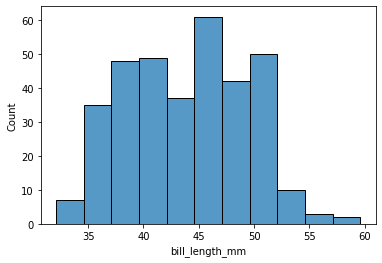

In [29]:
sns.histplot(pdf2.bill_length_mm)

In [30]:
(pdf2.bill_length_mm-pdf2.bill_length_mm.min())/(pdf2.bill_length_mm.max()-pdf2.bill_length_mm.min())

0      0.254545
1      0.269091
2      0.298182
3      0.429888
4      0.167273
         ...   
339    0.429888
340    0.534545
341    0.665455
342    0.476364
343    0.647273
Name: bill_length_mm, Length: 344, dtype: float64

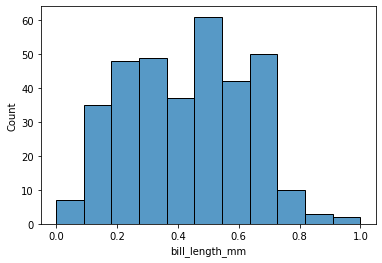

In [31]:
sns.histplot((pdf2.bill_length_mm-pdf2.bill_length_mm.min())/(pdf2.bill_length_mm.max()-pdf2.bill_length_mm.min()))

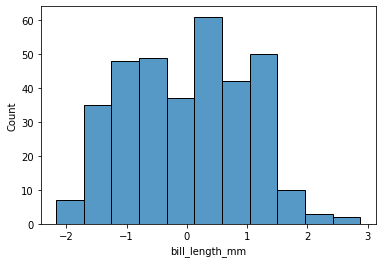

In [32]:
sns.histplot((pdf2.bill_length_mm-pdf2.bill_length_mm.mean())/pdf2.bill_length_mm.std())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


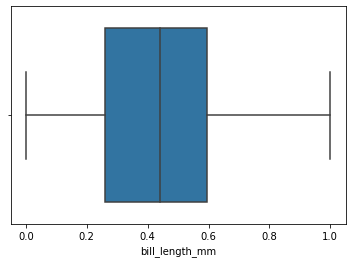

In [33]:
sns.boxplot((pdf2.bill_length_mm-pdf2.bill_length_mm.min())/(pdf2.bill_length_mm.max()-pdf2.bill_length_mm.min()))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


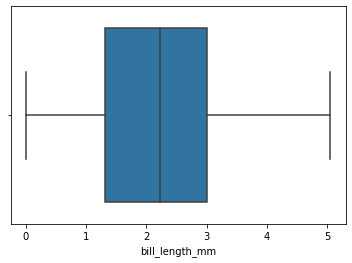

In [34]:
sns.boxplot((pdf2.bill_length_mm-pdf2.bill_length_mm.min())/pdf2.bill_length_mm.std())

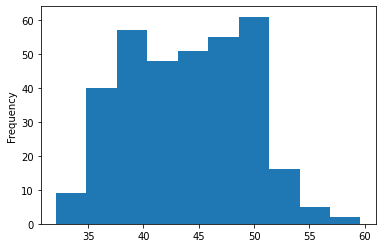

In [35]:
pdf2.bill_length_mm.plot(kind='hist')

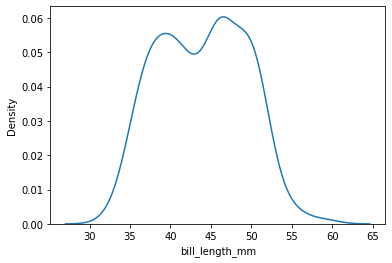

In [36]:
sns.kdeplot(pdf2.bill_length_mm)

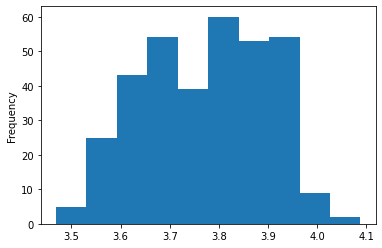

In [37]:
(np.log(pdf2.bill_length_mm)).plot(kind='hist')

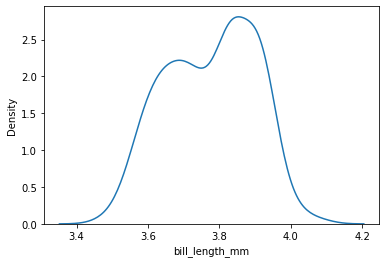

In [38]:
sns.kdeplot(np.log(pdf2.bill_length_mm))

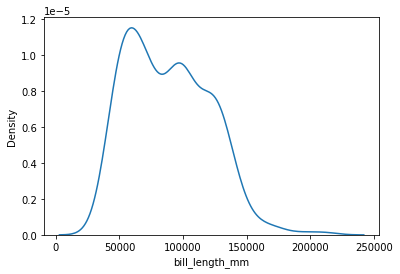

In [39]:
sns.kdeplot(pdf2.bill_length_mm**3)

In [40]:
x=pdf2.bill_length_mm**3

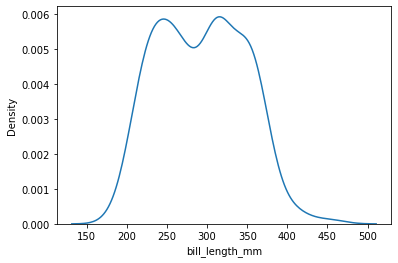

In [41]:
sns.kdeplot(x**(1/2))

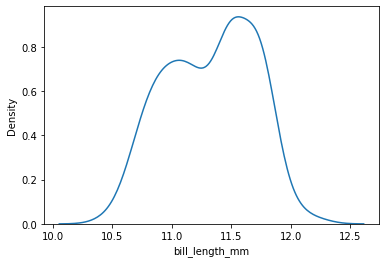

In [42]:
sns.kdeplot(np.log(x))